In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv(r'C:\Users\syedo\OneDrive\Documents\traincsv.csv')  # training data
print(df.shape)
print(df.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

In [5]:
print(df.isnull().sum().sort_values(ascending=False).head(20))
df = df.dropna(subset=['GarageArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr'])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


In [6]:
features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt']
X = df[features]
y = df['SalePrice']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MSE: 1784236183.4465346
R² Score: 0.7673845759291569


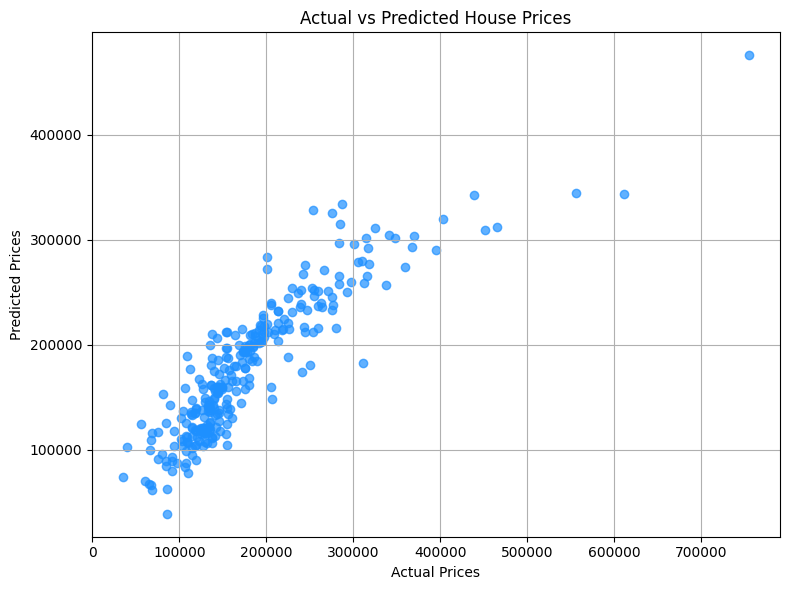

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")


GrLivArea: 81.775251468026
TotalBsmtSF: 29.625429183921376
GarageArea: 56.08417138519259
BedroomAbvGr: -11936.630346086433
FullBath: 2084.195951121052
YearBuilt: 669.424552782435
